# Compare Regions - ENEM 2009

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from CompareRegionsFunctions import *

ano = '2009'

## 1. Ciências Humanas

In [2]:
comp = 'CH'
df_reg = get_df_reg(comp, ano)
print_mean_std(df_reg, comp)

N - Média: 469.62;   Std: 89.31
NE - Média: 479.71;   Std: 96.91
SE - Média: 514.98;   Std: 102.02
S - Média: 509.95;   Std: 96.09
CO - Média: 499.68;   Std: 98.90
Geral - Média: 500.03;   Std: 100.02


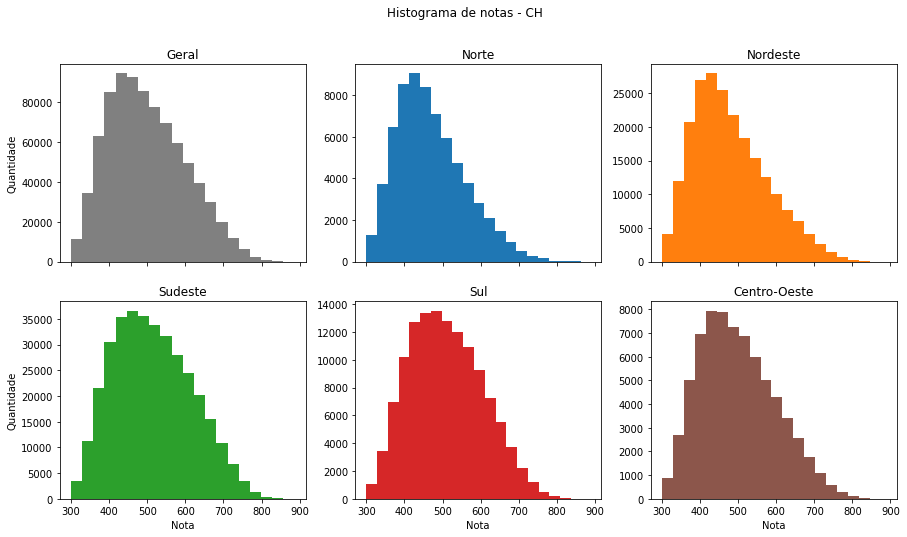

In [3]:
plot_hist_scores(df_reg, comp)

In [4]:
questoes_list = list(df_reg['N'].columns[2:])

bin_reg = bin_scores(df_reg, comp, questoes_list, nota_min=300, nota_max=760, step=20)
auc_reg = auc_regions(bin_reg, questoes_list)

auc_reg

,N,NE,SE,S,CO,Geral
Item 58083,11.615205,11.379916,11.694551,11.416454,11.499349,11.537579
Item 58114,11.847377,11.845397,12.150475,12.042320,11.977151,12.005342
Item 58520,6.346333,6.697105,6.491351,6.179820,6.513900,6.468881
Item 58533,5.447136,5.375888,5.688192,5.322120,5.492949,5.521566
Item 58536,9.270225,9.187887,9.253755,9.103235,9.061569,9.184314
Item 58726,9.700178,9.821866,9.841061,9.984634,9.818291,9.835231
Item 58778,6.211873,5.938132,6.232959,6.297812,6.175152,6.163293
Item 60181,7.088407,7.225986,6.983968,7.108318,7.013248,7.057214
Item 60182,14.567067,14.645313,14.399192,14.376406,14.442110,14.488428
Item 60183,6.965337,6.280463,6.066785,5.747296,5.899557,6.102888


In [5]:
sort_abs_auc_dif(auc_reg)

Item 60189    0.079852
Item 60188    0.110382
Item 60193    0.142387
Item 58536    0.150520
Item 58726    0.166342
Item 60199    0.171571
Item 60194    0.183778
Item 60196    0.196273
Item 60185    0.197994
Item 60192    0.211477
Item 60181    0.242018
Item 60190    0.243972
Item 60209    0.245762
Item 60182    0.246121
Item 60195    0.250233
Item 60224    0.250753
Item 60223    0.274474
Item 60184    0.280041
Item 60186    0.285560
Item 60191    0.293304
Item 58778    0.294827
Item 58114    0.305078
Item 58083    0.314634
Item 60215    0.331697
Item 60202    0.333648
Item 60203    0.336960
Item 60219    0.340683
Item 60198    0.341576
Item 58520    0.350772
Item 60210    0.352516
Item 58533    0.366072
Item 60211    0.374266
Item 60217    0.391495
Item 60208    0.396052
Item 60197    0.433254
Item 60207    0.462797
Item 60225    0.511663
Item 60200    0.545059
Item 60204    0.575956
Item 60212    0.588543
Item 60183    0.684874
Item 60206    0.695055
Item 60187    0.808588
Item 60201 

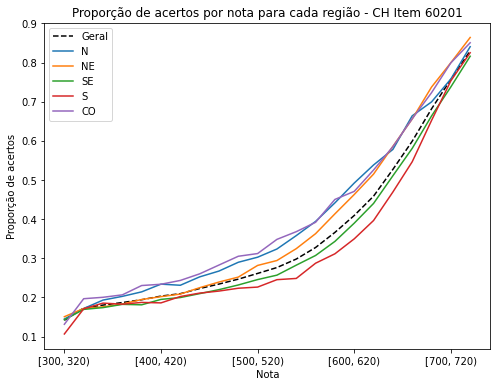

In [7]:
plot_item_compar(bin_reg, comp, item = 'Item 60201')

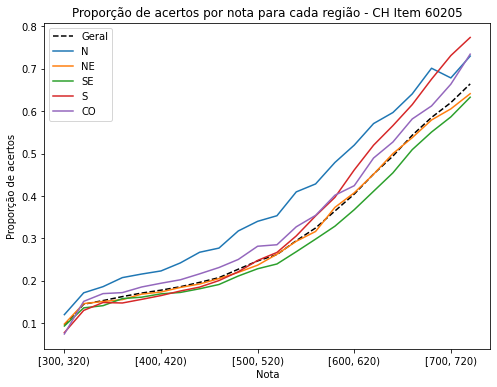

In [8]:
plot_item_compar(bin_reg, comp, item = 'Item 60205')

## 2. Ciências da Natureza

In [9]:
comp = 'CN'
df_reg = get_df_reg(comp, ano)
print_mean_std(df_reg, comp)

N - Média: 464.57;   Std: 89.21
NE - Média: 475.74;   Std: 97.01
SE - Média: 516.42;   Std: 101.70
S - Média: 514.43;   Std: 93.49
CO - Média: 501.54;   Std: 98.22
Geral - Média: 500.03;   Std: 100.02


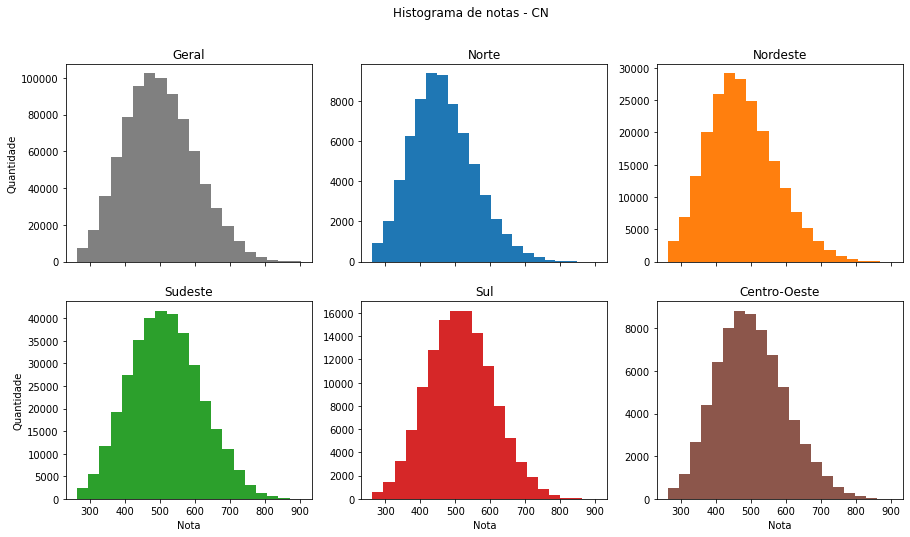

In [10]:
plot_hist_scores(df_reg, comp)

In [11]:
questoes_list = list(df_reg['N'].columns[2:])

bin_reg = bin_scores(df_reg, comp, questoes_list, nota_min=300, nota_max=760, step=20)
auc_reg = auc_regions(bin_reg, questoes_list)

auc_reg

,N,NE,SE,S,CO,Geral
Item 57968,15.642058,15.549045,15.480164,15.511907,15.596716,15.527055
Item 57978,10.798791,10.669981,10.860124,10.633307,10.561524,10.745267
Item 58396,11.671568,11.823147,11.935004,11.865265,11.898355,11.881106
Item 58443,14.301928,14.338864,14.175751,13.874607,14.284562,14.157862
Item 59275,15.172919,15.192110,15.054814,14.838391,15.066023,15.052395
Item 59286,11.453556,11.548501,11.759611,11.597363,11.659608,11.624355
Item 59311,10.259858,10.728114,10.721940,10.749718,10.729465,10.668679
Item 59321,12.880511,12.131807,12.174786,12.532256,12.542987,12.315625
Item 60083,5.021315,5.366480,5.311088,5.161156,5.545961,5.311221
Item 60084,8.758450,8.691239,8.920455,9.125530,8.741546,8.918277


In [12]:
sort_abs_auc_dif(auc_reg)

Item 60129    0.071684
Item 60150    0.088543
Item 57968    0.093013
Item 60139    0.095622
Item 60128    0.095842
Item 60142    0.112134
Item 60151    0.134262
Item 60145    0.136564
Item 58396    0.151579
Item 60137    0.158307
Item 60143    0.168303
Item 60127    0.184648
Item 60149    0.195177
Item 59286    0.211110
Item 57978    0.226817
Item 59275    0.227631
Item 60148    0.228350
Item 60147    0.229504
Item 60138    0.241633
Item 60131    0.264910
Item 60086    0.266473
Item 60132    0.295763
Item 60087    0.308476
Item 60152    0.308773
Item 60090    0.329523
Item 60134    0.332044
Item 60133    0.339983
Item 60089    0.352652
Item 60146    0.359431
Item 60091    0.364743
Item 60084    0.383984
Item 60083    0.384805
Item 60135    0.393487
Item 58443    0.409955
Item 60136    0.431070
Item 59311    0.468257
Item 60085    0.477047
Item 60144    0.497855
Item 60092    0.538039
Item 60140    0.541236
Item 60126    0.566384
Item 60088    0.606812
Item 59321    0.748703
Item 60141 

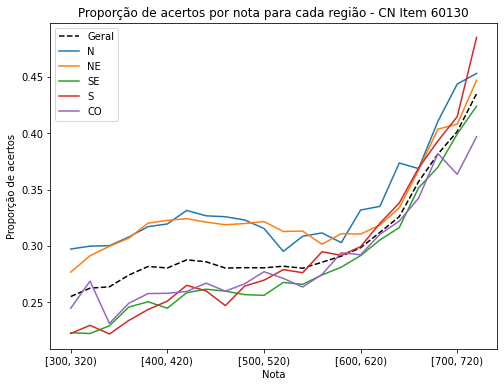

In [13]:
plot_item_compar(bin_reg, comp, item = 'Item 60130')

## 3. Matemática

In [14]:
comp = 'MT'

df_reg = get_df_reg(comp, ano)
print_mean_std(df_reg, comp)

N - Média: 466.23;   Std: 77.48
NE - Média: 478.46;   Std: 91.01
SE - Média: 516.90;   Std: 106.26
S - Média: 511.17;   Std: 97.31
CO - Média: 495.50;   Std: 97.87
Geral - Média: 500.03;   Std: 100.03


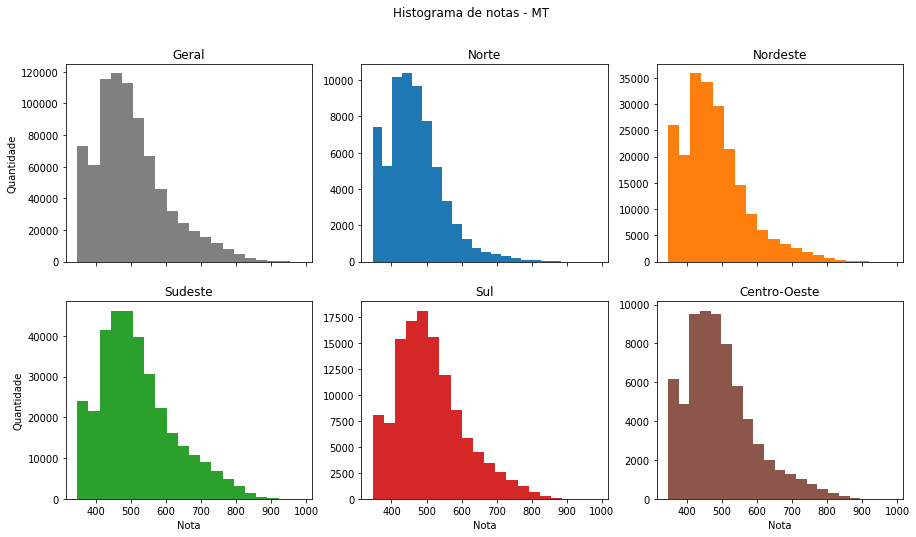

In [15]:
plot_hist_scores(df_reg, comp)

In [16]:
questoes_list = list(df_reg['N'].columns[2:])

bin_reg = bin_scores(df_reg, comp, questoes_list, nota_min=300, nota_max=760, step=20)
auc_reg = auc_regions(bin_reg, questoes_list)

auc_reg

,N,NE,SE,S,CO,Geral
Item 58608,5.508584,5.401524,5.042852,5.291408,5.427244,5.230566
Item 58672,4.976985,4.905608,4.695493,4.820525,4.921488,4.808002
Item 58675,5.868485,5.774952,5.623101,5.548371,5.805578,5.663210
Item 58784,3.768563,3.655916,3.545932,3.640518,3.675241,3.629924
Item 58815,8.042537,8.165045,8.153971,8.124775,8.204250,8.143339
Item 59010,7.755920,7.891487,7.937626,7.967565,7.911079,7.916182
Item 59484,6.333187,6.430235,6.631417,6.447761,6.405888,6.526897
Item 60226,6.039589,6.071438,6.256754,6.063830,6.099286,6.166746
Item 60227,5.097165,5.115351,4.803780,4.688018,4.790644,4.879155
Item 60228,9.044036,8.988212,9.005729,8.884296,9.076456,9.000957


In [17]:
sort_abs_auc_dif(auc_reg)

Item 60230    0.028545
Item 60261    0.077153
Item 60256    0.078290
Item 60260    0.080117
Item 60259    0.085098
Item 60241    0.109898
Item 58784    0.112647
Item 58815    0.122508
Item 60257    0.134971
Item 59010    0.135567
Item 60244    0.144458
Item 60252    0.152186
Item 60243    0.157801
Item 60231    0.159792
Item 60258    0.169073
Item 60245    0.169188
Item 60242    0.174616
Item 60228    0.192160
Item 60248    0.192471
Item 60226    0.192923
Item 60234    0.200179
Item 59484    0.201182
Item 60262    0.201613
Item 60263    0.206575
Item 58672    0.210115
Item 60238    0.211583
Item 60236    0.229554
Item 60251    0.231114
Item 60254    0.235703
Item 60233    0.241703
Item 60253    0.243835
Item 60249    0.249148
Item 58675    0.257207
Item 60255    0.265794
Item 60250    0.279544
Item 60239    0.287238
Item 60227    0.311570
Item 60240    0.312098
Item 60229    0.355461
Item 60232    0.358495
Item 58608    0.358672
Item 60246    0.395862
Item 60235    0.396603
Item 60237 

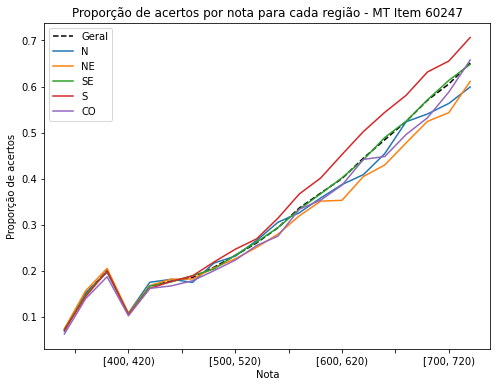

In [19]:
plot_item_compar(bin_reg, comp, item = 'Item 60247')

## 4. Linguagens e Códigos

In [34]:
comp = 'LC'

df_reg = get_df_reg(comp, ano)
print_mean_std(df_reg, comp)

N - Média: 462.54;   Std: 93.00
NE - Média: 476.58;   Std: 99.46
SE - Média: 518.89;   Std: 99.01
S - Média: 508.41;   Std: 94.37
CO - Média: 499.85;   Std: 98.35
Geral - Média: 500.03;   Std: 100.02


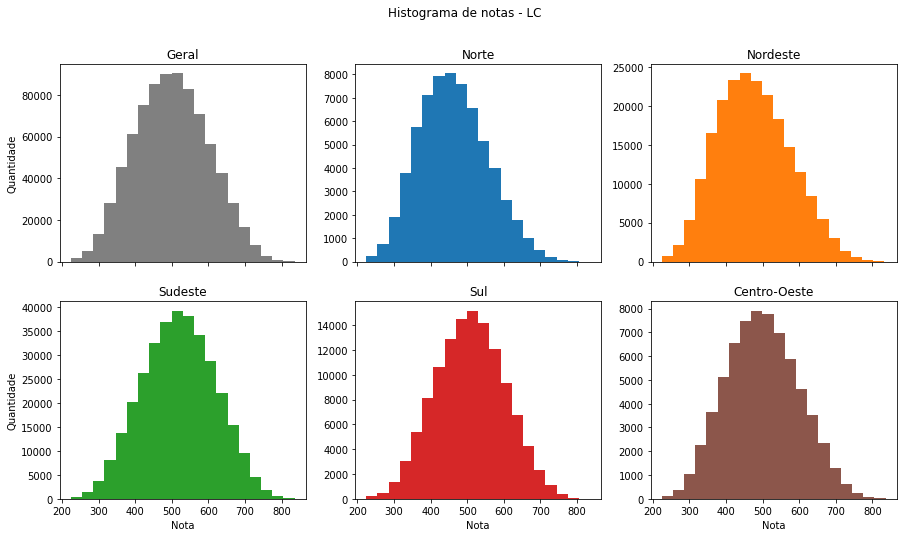

In [35]:
plot_hist_scores(df_reg, comp)

In [36]:
questoes_list = list(df_reg['N'].columns[2:])

bin_reg = bin_scores(df_reg, comp, questoes_list, nota_min=300, nota_max=760, step=20)
auc_reg = auc_regions(bin_reg, questoes_list)

auc_reg

,N,NE,SE,S,CO,Geral
Item 58219,11.109129,11.278056,10.969263,10.643712,11.131605,11.011306
Item 59074,14.088529,14.019284,14.787550,14.633239,14.652337,14.457379
Item 59175,12.999783,12.959068,13.416281,13.141711,13.434775,13.177366
Item 59558,11.157850,11.247559,11.039989,10.993742,11.205114,11.063564
Item 59561,11.115866,11.192157,11.091370,11.017521,11.106081,11.075747
Item 59578,12.166287,11.951244,11.935345,11.697361,11.885030,11.914981
Item 59610,14.266159,14.307628,14.569145,14.302863,14.435979,14.412939
Item 60123,12.177027,11.967686,12.050871,11.832451,12.075214,12.012066
Item 60124,9.184511,9.233331,9.064924,8.921649,8.950207,9.053560
Item 60125,14.631656,14.671658,14.799617,14.804430,14.793810,14.749296


In [37]:
sort_abs_auc_dif(auc_reg)

Item 59561    0.100787
Item 60125    0.127958
Item 60175    0.144518
Item 60156    0.151661
Item 60220    0.154192
Item 60176    0.163729
Item 60222    0.166900
Item 60161    0.167518
Item 60124    0.168407
Item 60154    0.170134
Item 60170    0.180871
Item 60177    0.193890
Item 60153    0.199331
Item 59558    0.211372
Item 60174    0.214434
Item 60214    0.218452
Item 59578    0.237984
Item 60167    0.240380
Item 60123    0.242763
Item 60169    0.243770
Item 60168    0.250835
Item 60160    0.254522
Item 59610    0.266282
Item 60158    0.269817
Item 60164    0.272535
Item 60157    0.272946
Item 60221    0.276676
Item 60218    0.294077
Item 60216    0.301922
Item 60173    0.308371
Item 60162    0.311065
Item 60166    0.325944
Item 60213    0.334078
Item 60163    0.334852
Item 60179    0.358475
Item 60172    0.404900
Item 60165    0.409074
Item 60180    0.423449
Item 60171    0.452955
Item 59175    0.457213
Item 58219    0.487893
Item 60178    0.552127
Item 60155    0.562216
Item 59074 

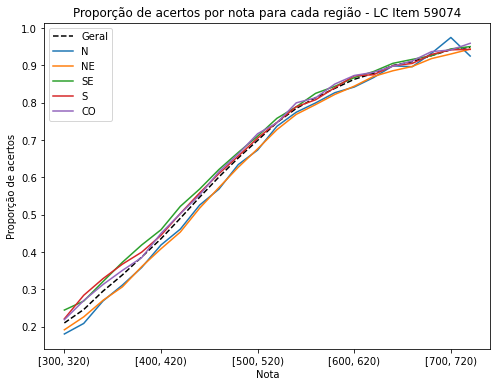

In [38]:
plot_item_compar(bin_reg, comp, item = 'Item 59074')